In [2]:
import pandas as pd
import datetime
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/train.csv')

# Exploratory Analysis

In [4]:
df['stmt_date'] = pd.to_datetime(df['stmt_date'])
df['def_date'] = pd.to_datetime(df['def_date'])

In [4]:
new_df = df[~df['def_date'].isnull()]

In [5]:
(new_df['def_date'] - new_df['stmt_date']).dt.days

957960      305
957961      210
957962      357
957963      324
957964      136
           ... 
1013379    1110
1013380    1475
1013381     745
1013382     380
1013383    1841
Length: 55424, dtype: int64

In [6]:
df.head()

,Unnamed: 0,id,stmt_date,HQ_city,legal_struct,ateco_sector,def_date,fs_year,asst_intang_fixed,asst_tang_fixed,...,inc_extraord,taxes,profit,days_rec,ebitda,roa,roe,wc_net,margin_fin,cf_operations
0,17,520288,2011-12-31,28.0,SRL,14.0,NaT,2011,67537.0,1137566.0,...,-309.0,-80959.0,-81288.0,NaN,6318.0,-3.81,-28.03,496258.0,-917029.0,-849.0
1,18,520288,2008-12-31,28.0,SRL,14.0,NaT,2008,256438.0,1181416.0,...,-678.0,-94622.0,-107382.0,NaN,46088.0,-2.76,NaN,97952.0,NaN,-3881.0
2,19,520288,2009-12-31,28.0,SRL,14.0,NaT,2009,194046.0,1152014.0,...,4224.0,-74235.0,-77819.0,NaN,67611.0,-2.17,NaN,-210671.0,NaN,32618.0
3,21,520288,2012-12-31,28.0,SRL,14.0,NaT,2012,15195.0,1116938.0,...,3634.0,-250786.0,-250786.0,NaN,-161478.0,-12.99,NaN,367892.0,-1094962.0,-168907.0
4,22,520288,2007-12-31,28.0,SRL,14.0,NaT,2007,126603.0,1127807.0,...,820.0,92192.0,36733.0,NaN,153060.0,6.20,52.43,-317007.0,-1184970.0,80039.0


In [5]:
# change of target variable
def defaulted(ser):
    if pd.isnull(ser['def_date']) or (ser['def_date'] - ser['stmt_date']).days > 365:
        return 0 
    else:
        return 1
df['defaulted'] = df.apply(defaulted,axis=1)

In [ ]:
data = df[df['defaulted']==0]
def_data = df[df['defaulted']==1]

In [48]:
data['id'].unique().shape[0]
## 237711 家公司

237711

In [290]:
data['id'].value_counts().value_counts().sort_index()

1     29963
2     25870
3     23149
4     22412
5     35148
6    101169
Name: id, dtype: int64

In [261]:
def_data['id'].unique().shape[0]

19634

In [291]:
def_data['id'].value_counts().value_counts().sort_index()

1    5031
2    4349
3    3884
4    3013
5    2151
6    1206
Name: id, dtype: int64

In [292]:
def_data['id'].value_counts().value_counts().sort_index()/data['id'].value_counts().value_counts().sort_index()

1    0.167907
2    0.168110
3    0.167783
4    0.134437
5    0.061198
6    0.011921
Name: id, dtype: float64

### 借的次数少 default 可能性越大

### default 后减小能借的可能性

### Q: Some companies with more rows have less possibilities to default？

#### stmt_time

In [72]:
data['stmt_date'].dt.year.value_counts()

2012    185639
2011    184973
2010    175399
2009    171150
2008    161863
2007    144528
Name: stmt_date, dtype: int64

#### HQ_city

In [78]:
data['HQ_city'].value_counts().sort_index()

1.0      34781
2.0       1794
3.0       6133
4.0       9785
5.0       2481
         ...  
106.0      213
107.0      270
108.0    20394
109.0     3030
110.0     2766
Name: HQ_city, Length: 110, dtype: int64

In [79]:
#### categorical feature —— 110 cities intotal

In [263]:
def_data['HQ_city'].value_counts().sort_index()

1.0      2074
2.0       101
3.0       388
4.0       441
5.0       138
         ... 
106.0       6
107.0       8
108.0     530
109.0     160
110.0     153
Name: HQ_city, Length: 109, dtype: int64

In [293]:
def_data['HQ_city'].value_counts().sort_index()[100]

793

In [294]:
def_data['HQ_city'].value_counts().sort_index()[57]

9

In [267]:
def_city_rate=def_data['HQ_city'].value_counts().sort_index()/data['HQ_city'].value_counts().sort_index()

In [271]:
def_city_rate.sort_values()

57.0     0.012397
91.0     0.018597
94.0     0.023359
102.0    0.023732
38.0     0.023738
           ...   
42.0     0.085001
31.0     0.086439
41.0     0.093933
100.0    0.096837
105.0         NaN
Name: HQ_city, Length: 110, dtype: float64

#### legal_struct

#### A business legal structure, also known as a business entity, is a government classification that regulates certain aspects of your business. On a federal level, your business legal structure determines your tax burden. On a state level, it can have liability ramifications.

### significance with tax**

#### Legal structure of the firm

In [81]:
data['legal_struct'].value_counts()

SRL    738994
SRU    152455
SPA    106246
SAU     25599
SAA       248
SRS        10
Name: legal_struct, dtype: int64

In [279]:
def_data['legal_struct'].value_counts()

SRL    39268
SRU    11633
SPA     3688
SAU      827
SAA        7
SRS        1
Name: legal_struct, dtype: int64

In [280]:
def_data['legal_struct'].value_counts()/data['legal_struct'].value_counts()

SRL    0.053137
SRU    0.076304
SPA    0.034712
SAU    0.032306
SAA    0.028226
SRS    0.100000
Name: legal_struct, dtype: float64

### 解释标号

SPA:Società per azioni（ SpA或spa）是意大利的一种公司形式，意思是“有股份的公司”

SRL:società a responsabilità limitata (Srl)（字面意思是：有限责任公司）


#### ateco_sector: Industry sector code (see ATECO sector definition doc)

### group 为更粗的行业分类

In [86]:
data['ateco_sector'].value_counts().sort_index()

1.0     15994
2.0       562
3.0       467
5.0        20
6.0       152
        ...  
93.0     5574
94.0       24
95.0     1022
96.0     2599
99.0      237
Name: ateco_sector, Length: 83, dtype: int64

In [295]:
def_ateco_rate=def_data['ateco_sector'].value_counts().sort_index()/data['ateco_sector'].value_counts().sort_index()

In [289]:
def_ateco_rate.sort_values()

91.0    0.013423
37.0    0.017391
35.0    0.017583
87.0    0.019620
86.0    0.021882
          ...   
80.0    0.137275
84.0    0.147541
12.0    0.187500
7.0          NaN
75.0         NaN
Name: ateco_sector, Length: 83, dtype: float64

#### fs_year:Year of the financial statement XX

In [89]:
data['fs_year'].value_counts()

2012    185639
2011    184973
2010    175399
2009    171150
2008    161863
2007    144528
Name: fs_year, dtype: int64

### 与道格拉斯指数联系

#### asst_intang_fixed:Intangible assets——An intangible asset is an asset with no physical form. It's a long-term asset that accrues value year over year. Examples of intangible assets include intellectual property, brand recognition and reputation, relationships, and goodwill.

In [91]:
import seaborn as sns
sns.set()

In [232]:
def getbars(dataseries,max_value=None,min_value=0,bins=20):
    if max_value==None:
        max_value=dataseries.max()
    quant=dataseries.quantile([0.1*i for i in range(11)])
    quant=quant.drop_duplicates()
    segs=np.array([(max_value-min_value)/bins*i+min_value for i in range(bins)])
    cuts=pd.cut(dataseries,segs)
    counts=pd.value_counts(cuts).sort_index()
    plt.figure(figsize=(15,5))
    b=plt.bar(segs[:-1].astype(str),counts,align='edge',width=1)
    print(quant,counts)

In [233]:
data[['id','asst_intang_fixed']].loc[data['asst_intang_fixed'].isna()].shape[0]

162

In [234]:
asst_in=data['asst_intang_fixed'].dropna()

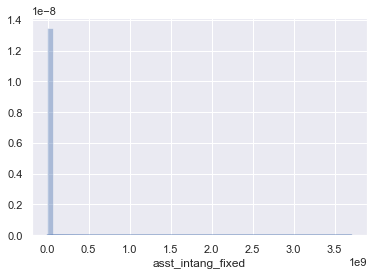

In [235]:
sns.distplot(asst_in)

0.0   -3.442959e+06
0.1    0.000000e+00
0.3    8.550000e+02
0.4    2.889000e+03
0.5    7.975000e+03
0.6    1.973300e+04
0.7    4.796430e+04
0.8    1.198360e+05
0.9    3.643991e+05
1.0    3.708467e+09
Name: asst_intang_fixed, dtype: float64 (0.0, 25000.0]          407037
(25000.0, 50000.0]       79780
(50000.0, 75000.0]       45880
(75000.0, 100000.0]      31987
(100000.0, 125000.0]     23794
(125000.0, 150000.0]     18735
(150000.0, 175000.0]     15384
(175000.0, 200000.0]     12714
(200000.0, 225000.0]     10857
(225000.0, 250000.0]      9398
(250000.0, 275000.0]      8172
(275000.0, 300000.0]      7225
(300000.0, 325000.0]      6505
(325000.0, 350000.0]      5810
(350000.0, 375000.0]      5336
(375000.0, 400000.0]      4878
(400000.0, 425000.0]      4467
(425000.0, 450000.0]      3984
(450000.0, 475000.0]      3645
Name: asst_intang_fixed, dtype: int64


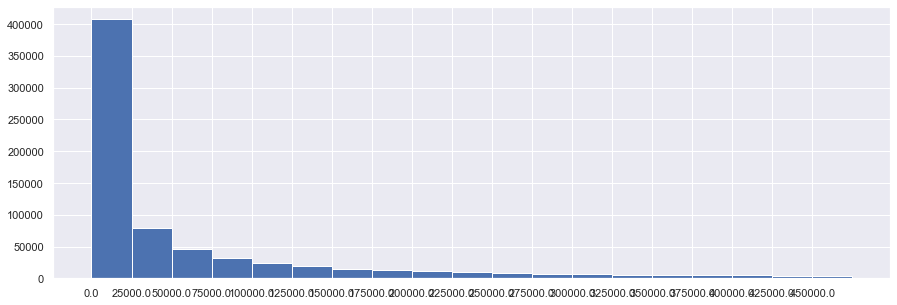

In [245]:
getbars(asst_in,max_value=500000,min_value=0,bins=20)

In [300]:
def_data[['id','asst_intang_fixed']].loc[data['asst_intang_fixed'].isna()].shape[0]

11

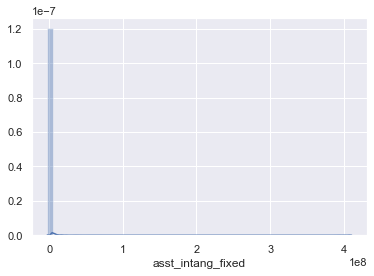

In [304]:
dfasst_in=def_data['asst_intang_fixed'].dropna()
sns.distplot(dfasst_in)

0.0     -2554740.0
0.1            0.0
0.2           96.0
0.3         1290.0
0.4         4150.0
0.5        12598.0
0.6        34284.0
0.7        83197.4
0.8       197200.2
0.9       509048.0
1.0    410639691.0
Name: asst_intang_fixed, dtype: float64 (0.0, 25000.0]          20705
(25000.0, 50000.0]       4078
(50000.0, 75000.0]       2586
(75000.0, 100000.0]      1884
(100000.0, 125000.0]     1403
(125000.0, 150000.0]     1229
(150000.0, 175000.0]      974
(175000.0, 200000.0]      837
(200000.0, 225000.0]      718
(225000.0, 250000.0]      638
(250000.0, 275000.0]      583
(275000.0, 300000.0]      514
(300000.0, 325000.0]      497
(325000.0, 350000.0]      430
(350000.0, 375000.0]      418
(375000.0, 400000.0]      355
(400000.0, 425000.0]      324
(425000.0, 450000.0]      320
(450000.0, 475000.0]      274
Name: asst_intang_fixed, dtype: int64


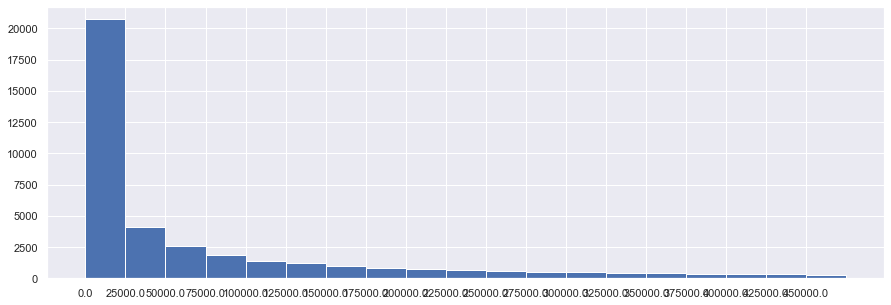

In [305]:
getbars(dfasst_in,max_value=500000)

In [307]:
df=data

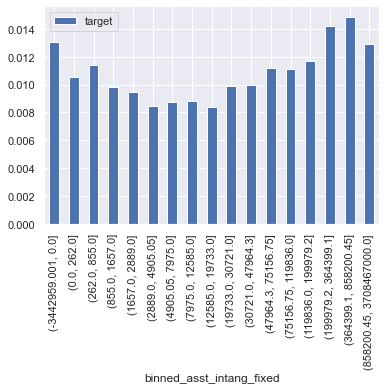

In [321]:
col='asst_intang_fixed'
df['binned_'+col] = pd.qcut(df[col], 20,duplicates='drop')
df[['binned_'+col, 'target']].groupby('binned_'+col).mean().reset_index().sort_values('binned_'+col).set_index('binned_'+col).plot.bar()

#### asst_tang_fixed:Tangible Assets

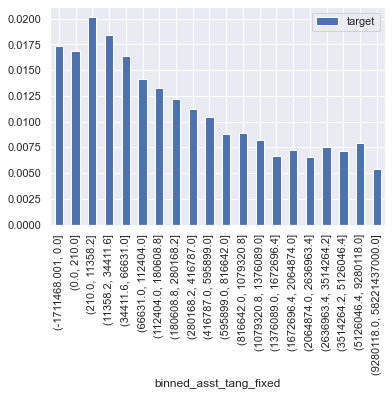

In [318]:
col='asst_tang_fixed'
df['binned_'+col] = pd.qcut(df[col], 20,duplicates='drop')
df[['binned_'+col, 'target']].groupby('binned_'+col).mean().reset_index().sort_values('binned_'+col).set_index('binned_'+col).plot.bar()

In [246]:
data[['id','asst_tang_fixed']].loc[data['asst_tang_fixed'].isna()].shape[0]

103

In [182]:
asst_tan=data['asst_tang_fixed'].dropna()

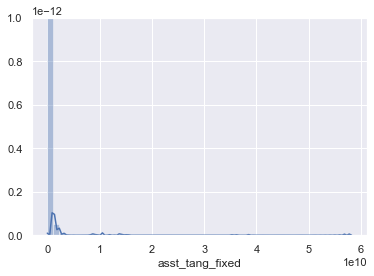

In [248]:
sns.distplot(asst_tan)

0.0   -1.711468e+06
0.1    2.100000e+02
0.2    3.441160e+04
0.3    1.124040e+05
0.4    2.801682e+05
0.5    5.958990e+05
0.6    1.079321e+06
0.7    1.672696e+06
0.8    2.636963e+06
0.9    5.126046e+06
1.0    5.822144e+10
Name: asst_tang_fixed, dtype: float64 (0.0, 500000.0]           386564
(500000.0, 1000000.0]     113634
(1000000.0, 1500000.0]     87865
(1500000.0, 2000000.0]     72849
(2000000.0, 2500000.0]     48177
(2500000.0, 3000000.0]     34757
(3000000.0, 3500000.0]     26157
(3500000.0, 4000000.0]     20006
(4000000.0, 4500000.0]     15886
(4500000.0, 5000000.0]     13126
(5000000.0, 5500000.0]     10408
(5500000.0, 6000000.0]      8962
(6000000.0, 6500000.0]      7761
(6500000.0, 7000000.0]      6535
(7000000.0, 7500000.0]      5558
(7500000.0, 8000000.0]      4821
(8000000.0, 8500000.0]      4292
(8500000.0, 9000000.0]      3767
(9000000.0, 9500000.0]      3409
Name: asst_tang_fixed, dtype: int64


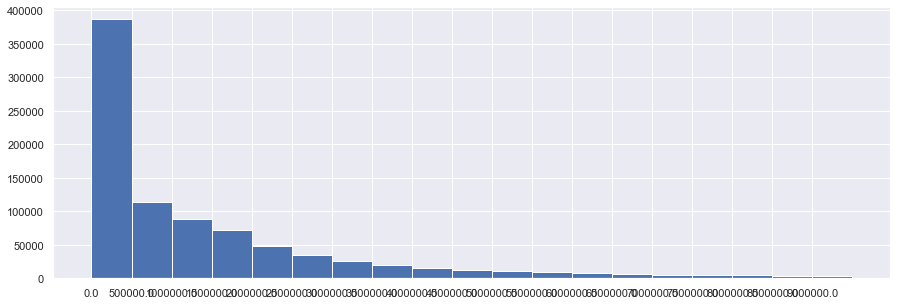

In [251]:
getbars(asst_tan,max_value=10000000)

#### asst_fixed_fin: 有形资产一部分，金融资产， 股票证券 存款k

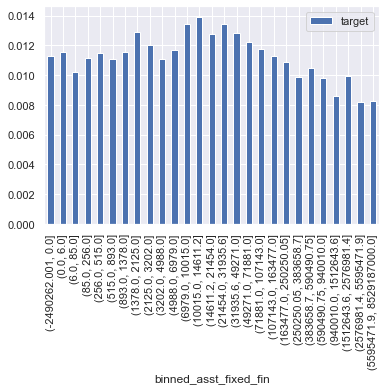

In [315]:
col='asst_fixed_fin'
df['binned_'+col] = pd.qcut(df[col], 40,duplicates='drop')
df[['binned_'+col, 'target']].groupby('binned_'+col).mean().reset_index().sort_values('binned_'+col).set_index('binned_'+col).plot.bar()

In [252]:
data[['id','asst_fixed_fin']].loc[data['asst_fixed_fin'].isna()].shape[0]

237

In [253]:
asst_fin=data['asst_fixed_fin'].dropna()

0.0   -2.490262e+06
0.1    0.000000e+00
0.4    8.500000e+01
0.5    1.378000e+03
0.6    6.979000e+03
0.7    3.193560e+04
0.8    1.634770e+05
0.9    9.400100e+05
1.0    8.529187e+09
Name: asst_fixed_fin, dtype: float64 (0.0, 426459350.0]              647656
(426459350.0, 852918700.0]         163
(852918700.0, 1279378050.0]         58
(1279378050.0, 1705837400.0]        26
(1705837400.0, 2132296750.0]        18
(2132296750.0, 2558756100.0]         8
(2558756100.0, 2985215450.0]         9
(2985215450.0, 3411674800.0]         2
(3411674800.0, 3838134150.0]         3
(3838134150.0, 4264593500.0]         1
(4264593500.0, 4691052850.0]         4
(4691052850.0, 5117512200.0]         1
(5117512200.0, 5543971550.0]         2
(5543971550.0, 5970430900.0]         1
(5970430900.0, 6396890250.0]         0
(6396890250.0, 6823349600.0]         2
(6823349600.0, 7249808950.0]         0
(7249808950.0, 7676268300.0]         0
(7676268300.0, 8102727650.0]         0
Name: asst_fixed_fin, dtype: int64


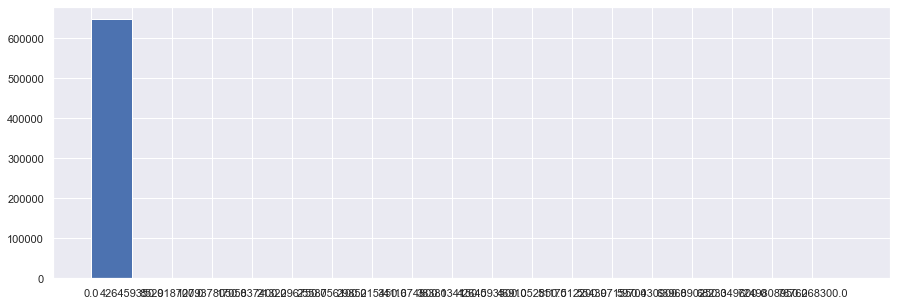

In [254]:
getbars(asst_fin)

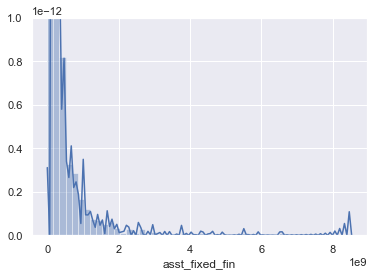

In [226]:
sns.distplot(asst_fin)

0.0   -2.490262e+06
0.1    0.000000e+00
0.4    8.500000e+01
0.5    1.378000e+03
0.6    6.979000e+03
0.7    3.193560e+04
0.8    1.634770e+05
0.9    9.400100e+05
1.0    8.529187e+09
Name: asst_fixed_fin, dtype: float64 (0.0, 250000.0]           468737
(250000.0, 500000.0]       41451
(500000.0, 750000.0]       23368
(750000.0, 1000000.0]      15517
(1000000.0, 1250000.0]     12150
(1250000.0, 1500000.0]      9423
(1500000.0, 1750000.0]      8256
(1750000.0, 2000000.0]      6413
(2000000.0, 2250000.0]      5640
(2250000.0, 2500000.0]      4438
(2500000.0, 2750000.0]      4087
(2750000.0, 3000000.0]      3373
(3000000.0, 3250000.0]      3035
(3250000.0, 3500000.0]      2458
(3500000.0, 3750000.0]      2295
(3750000.0, 4000000.0]      2101
(4000000.0, 4250000.0]      1907
(4250000.0, 4500000.0]      1585
(4500000.0, 4750000.0]      1587
Name: asst_fixed_fin, dtype: int64


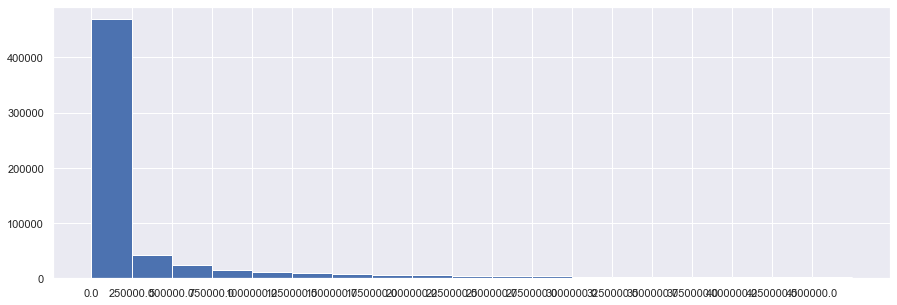

In [260]:
getbars(asst_fin,max_value=5000000)

### total= tangible+intangible  net_asset=total- 债务 

In [8]:
columns = ['inc_extraord', 'taxes', 'profit', 'days_rec',
       'ebitda', 'roa', 'roe', 'wc_net', 'margin_fin', 'cf_operations']

In [9]:
subdf = df[['cash_and_equiv', 'asst_tot', 'eqty_tot','liab_lt', 'liab_lt_emp', 'debt_bank_st', 'debt_bank_lt', 'debt_fin_st','debt_fin_lt', 'defaulted']]

# check for missingness
subdf.isna().sum()

cash_and_equiv        17
asst_tot               0
eqty_tot               1
liab_lt              294
liab_lt_emp          162
debt_bank_st      121331
debt_bank_lt       90971
debt_fin_st       122772
debt_fin_lt        92068
defaulted              0
dtype: int64

cash_and_equiv


C:\Users\Owen\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Owen\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


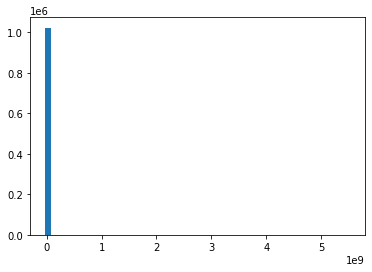

asst_tot


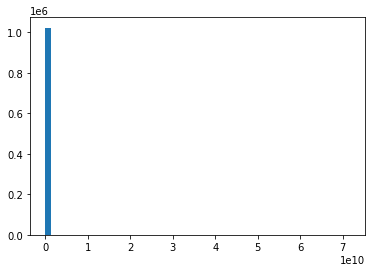

eqty_tot


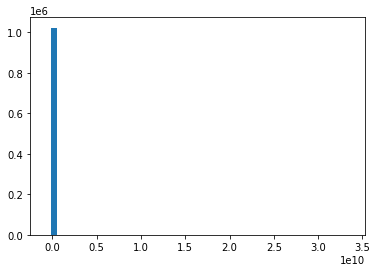

liab_lt


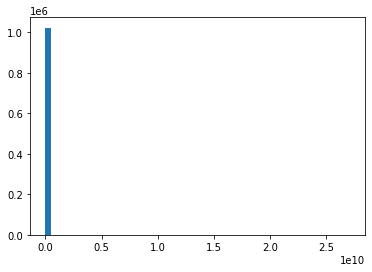

liab_lt_emp


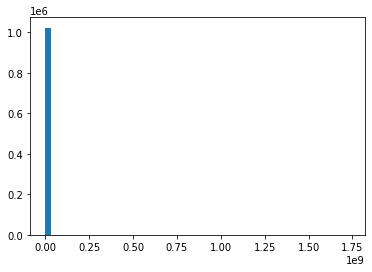

debt_bank_st


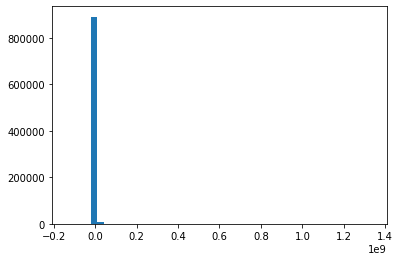

debt_bank_lt


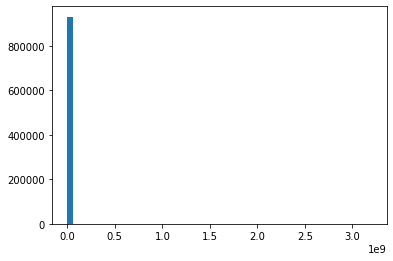

debt_fin_st


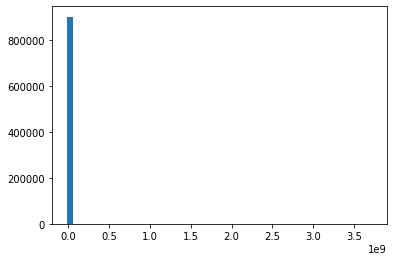

debt_fin_lt


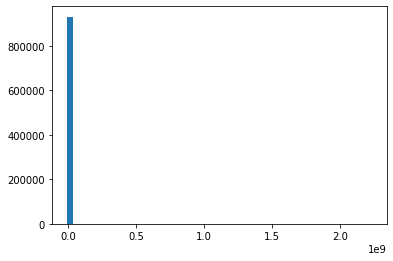

defaulted


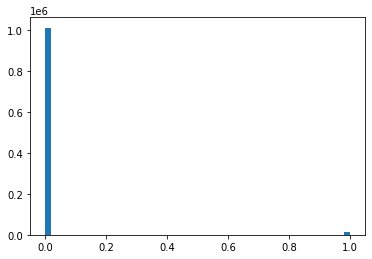

In [10]:
# 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

for x in subdf.columns.to_list():
    print(x)
    plt.figure()
    plt.hist(subdf[x], bins = 50)
    plt.show()

In [11]:
subdf.describe()

,cash_and_equiv,asst_tot,eqty_tot,liab_lt,liab_lt_emp,debt_bank_st,debt_bank_lt,debt_fin_st,debt_fin_lt,defaulted
count,1.023535e+06,1.023552e+06,1.023551e+06,1.023258e+06,1.023390e+06,9.022210e+05,9.325810e+05,9.007800e+05,9.314840e+05,1.023552e+06
mean,4.751146e+05,1.111351e+07,3.585192e+06,3.385748e+05,2.328660e+05,1.075719e+06,1.133471e+06,1.662351e+05,1.174775e+05,1.125590e-02
std,9.391475e+06,1.799274e+08,8.996885e+07,4.606932e+07,5.459489e+06,5.991084e+06,1.337126e+07,9.253849e+06,4.398384e+06,1.054951e-01
min,-2.584593e+07,1.500000e+06,-8.052920e+08,-1.283245e+06,-3.373560e+05,-1.350460e+08,-2.301536e+06,-1.458602e+07,-5.449856e+06,0.000000e+00
25%,6.223000e+03,2.170073e+06,1.673525e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.964700e+04,3.458428e+06,7.189230e+05,0.000000e+00,3.491800e+04,1.819910e+05,2.578400e+04,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.628755e+05,6.975953e+06,2.059212e+06,2.082000e+04,1.671930e+05,8.253260e+05,7.289840e+05,0.000000e+00,0.000000e+00,0.000000e+00
max,5.519622e+09,7.164463e+10,3.356488e+10,2.707827e+10,1.734028e+09,1.333087e+09,3.199651e+09,3.713192e+09,2.229168e+09,1.000000e+00


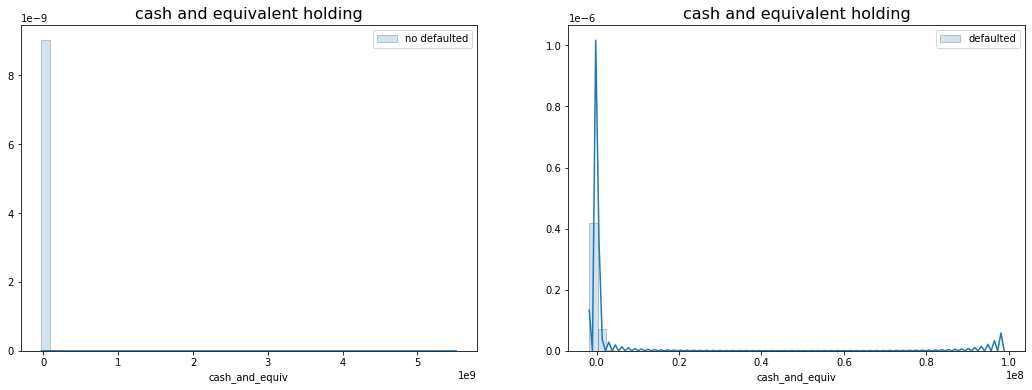

In [12]:
# 'cash_and_equiv': cash and equivalent holding
#, 'asst_tot', 'eqty_tot','liab_lt', 'liab_lt_emp', 'debt_bank_st', 'debt_bank_lt', 'debt_fin_st','debt_fin_lt'
import seaborn as sns

hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(subdf[subdf['defaulted'] == 0]['cash_and_equiv'], label='no defaulted', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(subdf[subdf['defaulted'] == 1]['cash_and_equiv'], label='defaulted', 
             ax=ax[1], hist_kws=hist_kws)
ax[0].set_title('cash and equivalent holding', fontsize=16)
ax[0].legend()

ax[1].set_title('cash and equivalent holding', fontsize=16)
ax[1].legend()
plt.show()

<AxesSubplot:xlabel='binned_cash_and_equiv'>

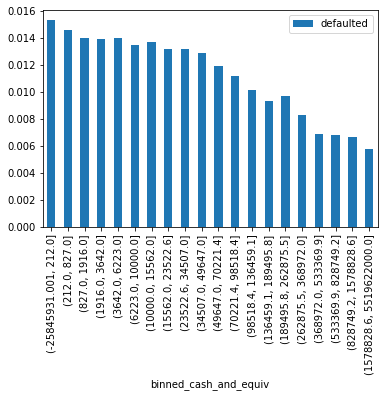

In [6]:
col = 'cash_and_equiv'
df['binned_'+col] = pd.qcut(df[col], 20,duplicates='drop')
df[['binned_'+col, 'defaulted']].groupby('binned_'+col).mean().reset_index().sort_values('binned_'+col).set_index('binned_'+col).plot.bar()

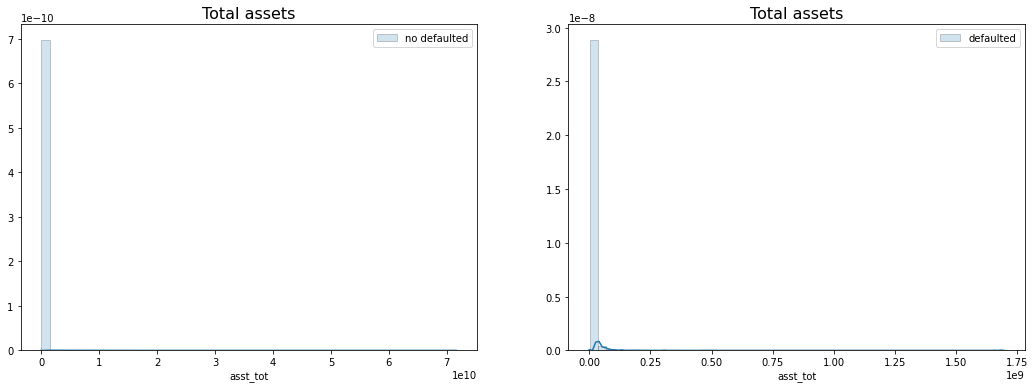

In [14]:
# 'asst_tot': Total assets

hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(subdf[subdf['defaulted'] == 0]['asst_tot'], label='no defaulted', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(subdf[subdf['defaulted'] == 1]['asst_tot'], label='defaulted', 
             ax=ax[1], hist_kws=hist_kws)
ax[0].set_title('Total assets', fontsize=16)
ax[0].legend()

ax[1].set_title('Total assets', fontsize=16)
ax[1].legend()
plt.show()

<AxesSubplot:xlabel='binned_asst_tot'>

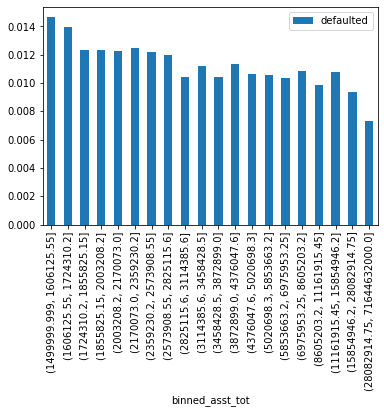

In [7]:
col = 'asst_tot'
df['binned_'+col] = pd.qcut(df[col], 20,duplicates='drop')
df[['binned_'+col, 'defaulted']].groupby('binned_'+col).mean().reset_index().sort_values('binned_'+col).set_index('binned_'+col).plot.bar()

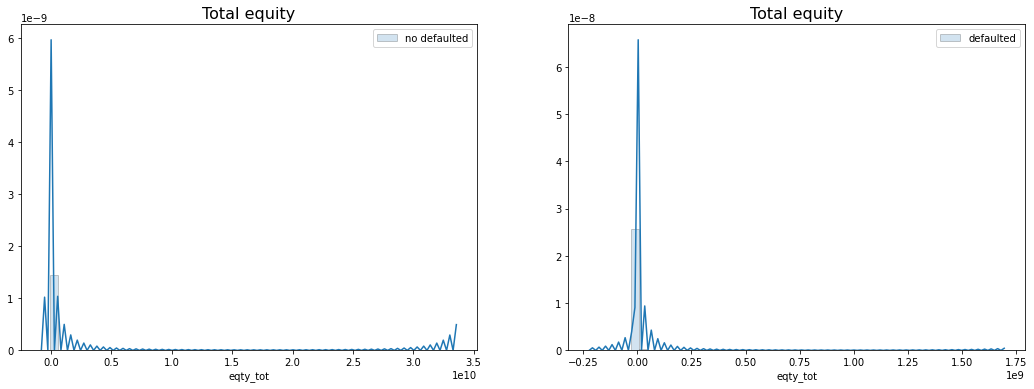

In [15]:
# 'eqty_tot': Total equity
#'liab_lt', 'liab_lt_emp', 'debt_bank_st', 'debt_bank_lt', 'debt_fin_st','debt_fin_lt'

hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(subdf[subdf['defaulted'] == 0]['eqty_tot'], label='no defaulted', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(subdf[subdf['defaulted'] == 1]['eqty_tot'], label='defaulted', 
             ax=ax[1], hist_kws=hist_kws)
ax[0].set_title('Total equity', fontsize=16)
ax[0].legend()

ax[1].set_title('Total equity', fontsize=16)
ax[1].legend()
plt.show()

<AxesSubplot:xlabel='binned_eqty_tot'>

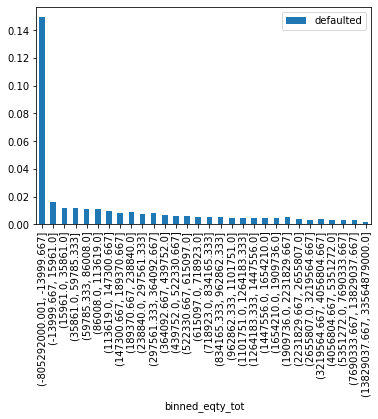

In [9]:
col = 'eqty_tot'
df['binned_'+col] = pd.qcut(df[col], 30,duplicates='drop')
df[['binned_'+col, 'defaulted']].groupby('binned_'+col).mean().reset_index().sort_values('binned_'+col).set_index('binned_'+col).plot.bar()

#### Binary feeture engineering

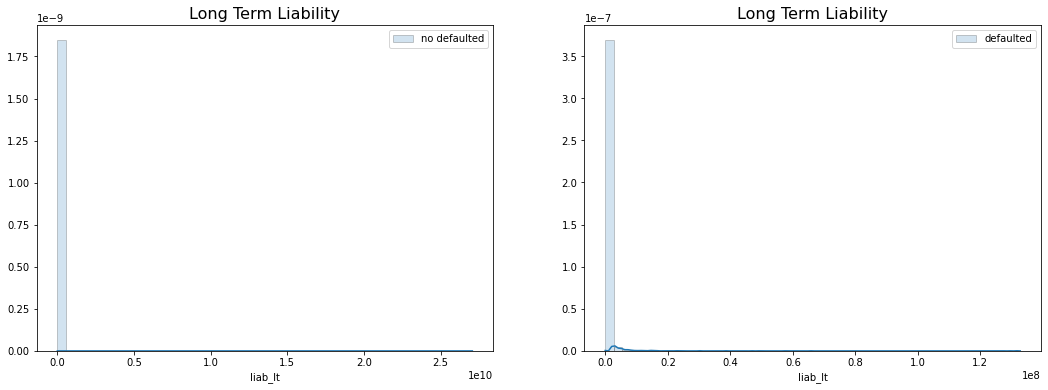

In [16]:
#'liab_lt':  Long Term Liability
#, 'liab_lt_emp', 'debt_bank_st', 'debt_bank_lt', 'debt_fin_st','debt_fin_lt'

hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(subdf[subdf['defaulted'] == 0]['liab_lt'], label='no defaulted', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(subdf[subdf['defaulted'] == 1]['liab_lt'], label='defaulted', 
             ax=ax[1], hist_kws=hist_kws)
ax[0].set_title('Long Term Liability', fontsize=16)
ax[0].legend()

ax[1].set_title('Long Term Liability', fontsize=16)
ax[1].legend()
plt.show()

<AxesSubplot:xlabel='binned_liab_lt'>

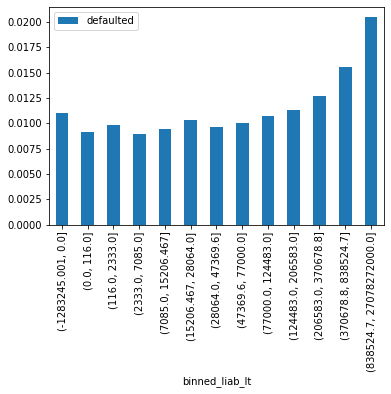

In [13]:
col = 'liab_lt'
df['binned_'+col] = pd.qcut(df[col], 30,duplicates='drop')
df[['binned_'+col, 'defaulted']].groupby('binned_'+col).mean().reset_index().sort_values('binned_'+col).set_index('binned_'+col).plot.bar()

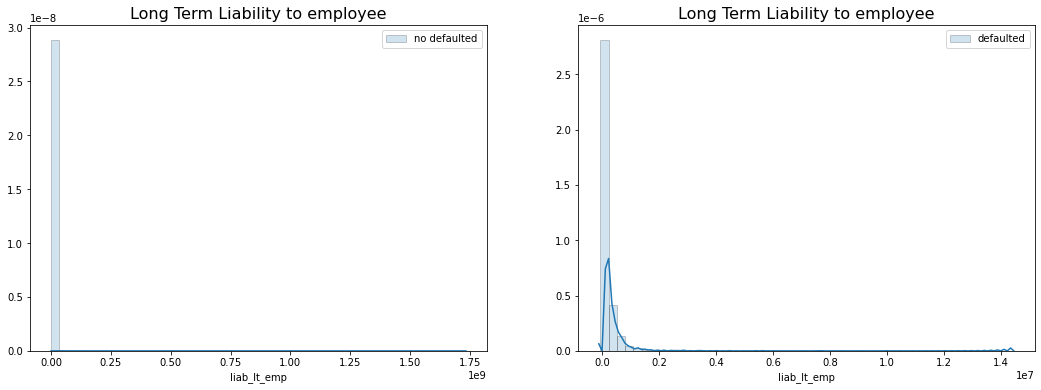

In [17]:
# 'liab_lt_emp': Long Term Liability to employee
# , 'debt_bank_st', 'debt_bank_lt', 'debt_fin_st','debt_fin_lt'

hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(subdf[subdf['defaulted'] == 0]['liab_lt_emp'], label='no defaulted', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(subdf[subdf['defaulted'] == 1]['liab_lt_emp'], label='defaulted', 
             ax=ax[1], hist_kws=hist_kws)
ax[0].set_title('Long Term Liability to employee', fontsize=16)
ax[0].legend()

ax[1].set_title('Long Term Liability to employee', fontsize=16)
ax[1].legend()
plt.show()

In [15]:
def binned_barplot(col, num=20):
    df['binned_'+col] = pd.qcut(df[col], 30,duplicates='drop')
    df[['binned_'+col, 'defaulted']].groupby('binned_'+col).mean().reset_index().sort_values('binned_'+col).set_index('binned_'+col).plot.bar()

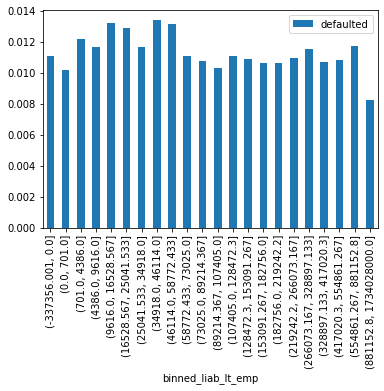

In [16]:
binned_barplot('liab_lt_emp')

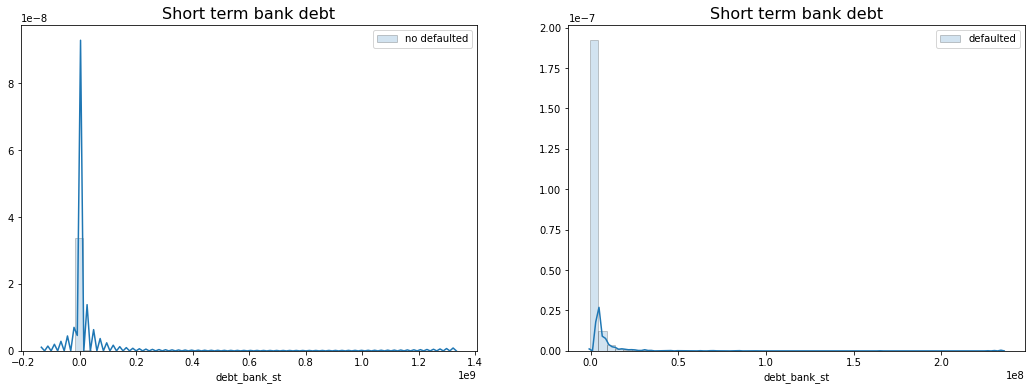

In [18]:
# 'debt_bank_st': Short term bank debt
#, 'debt_bank_lt', 'debt_fin_st','debt_fin_lt'

hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(subdf[subdf['defaulted'] == 0]['debt_bank_st'], label='no defaulted', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(subdf[subdf['defaulted'] == 1]['debt_bank_st'], label='defaulted', 
             ax=ax[1], hist_kws=hist_kws)
ax[0].set_title('Short term bank debt', fontsize=16)
ax[0].legend()

ax[1].set_title('Short term bank debt', fontsize=16)
ax[1].legend()
plt.show()

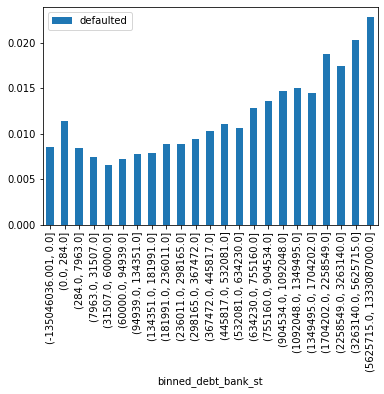

In [17]:
binned_barplot('debt_bank_st')

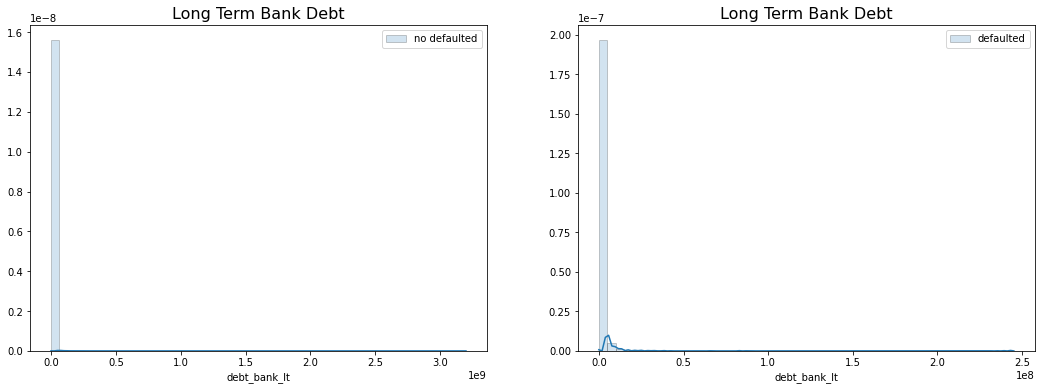

In [19]:
# 'debt_bank_lt': Long Term Bank Debt

hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(subdf[subdf['defaulted'] == 0]['debt_bank_lt'], label='no defaulted', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(subdf[subdf['defaulted'] == 1]['debt_bank_lt'], label='defaulted', 
             ax=ax[1], hist_kws=hist_kws)
ax[0].set_title('Long Term Bank Debt', fontsize=16)
ax[0].legend()

ax[1].set_title('Long Term Bank Debt', fontsize=16)
ax[1].legend()
plt.show()

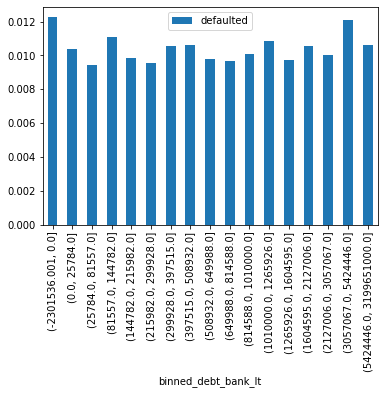

In [18]:
binned_barplot('debt_bank_lt')

C:\Users\Owen\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Owen\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


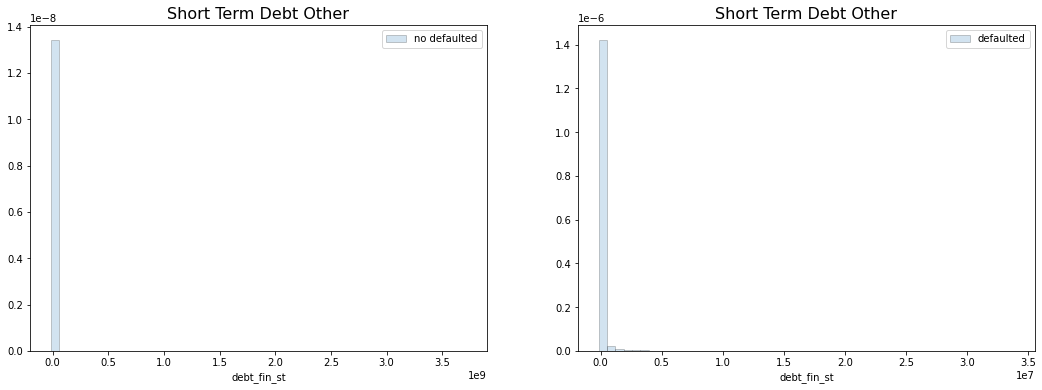

In [20]:
# 'debt_fin_st': Short Term Debt Other

hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(subdf[subdf['defaulted'] == 0]['debt_fin_st'], label='no defaulted', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(subdf[subdf['defaulted'] == 1]['debt_fin_st'], label='defaulted', 
             ax=ax[1], hist_kws=hist_kws)
ax[0].set_title('Short Term Debt Other', fontsize=16)
ax[0].legend()

ax[1].set_title('Short Term Debt Other', fontsize=16)
ax[1].legend()
plt.show()

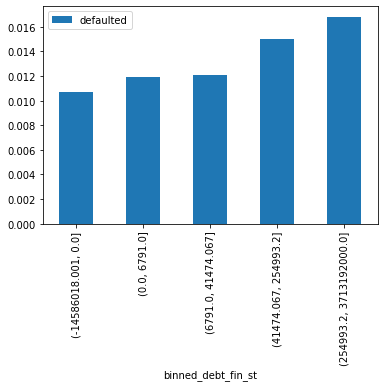

In [24]:
binned_barplot('debt_fin_st')

C:\Users\Owen\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Owen\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


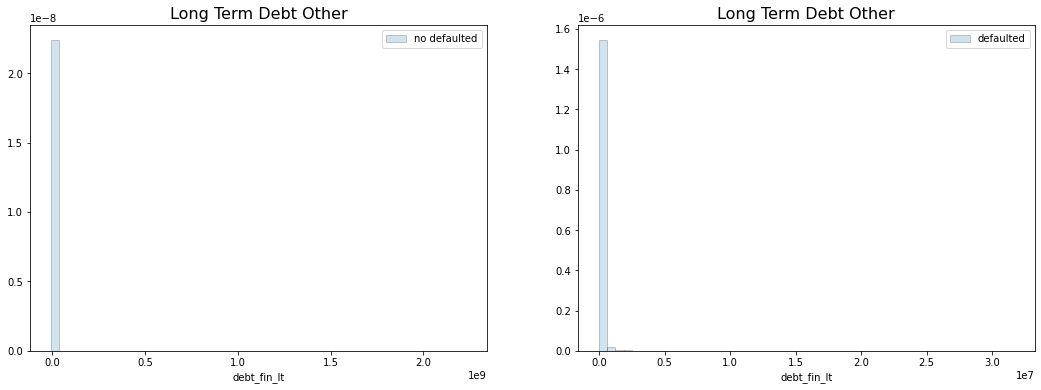

In [21]:
# 'debt_fin_lt': Long Term Debt Other

hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(subdf[subdf['defaulted'] == 0]['debt_fin_lt'], label='no defaulted', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(subdf[subdf['defaulted'] == 1]['debt_fin_lt'], label='defaulted', 
             ax=ax[1], hist_kws=hist_kws)
ax[0].set_title('Long Term Debt Other', fontsize=16)
ax[0].legend()

ax[1].set_title('Long Term Debt Other', fontsize=16)
ax[1].legend()
plt.show()

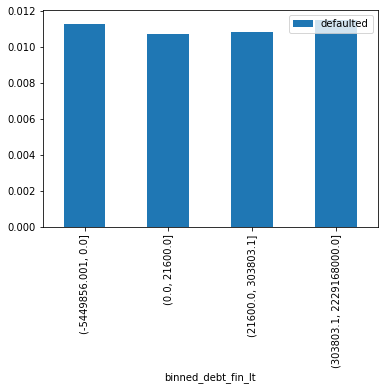

In [33]:
binned_barplot('debt_fin_lt')

# short term 


In [ ]:
def plot_distribution(df,num, col):
    df['binned_'+col] = pd.qcut(df[col], num,duplicates='drop')
    df[['binned_'+col, 'defaulted']].groupby('binned_'+col).mean().reset_index().sort_values('binned_'+col).set_index('binned_'+col).plot.bar()

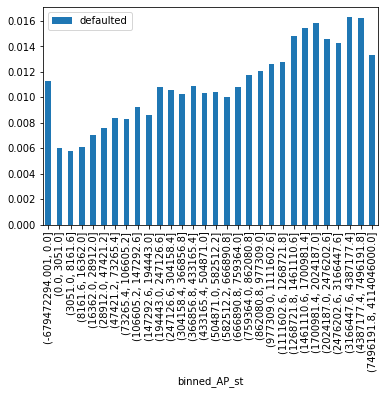

In [ ]:
plot_distribution(df, 30, 'AP_st')

In [ ]:
df['AP_st'].quantile([i * 0.1 for i in range(10)])

0.0   -679472294.0
0.1         8161.6
0.2        47421.2
0.3       147292.6
0.4       304158.4
0.5       504871.0
0.6       759364.0
0.7      1111602.6
0.8      1700981.4
0.9      3166447.6
Name: AP_st, dtype: float64

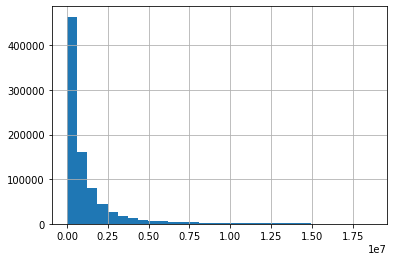

In [ ]:
df_apst = df[(df['AP_st'] < df['AP_st'].quantile(0.99)) & (df['AP_st'] > df['AP_st'].quantile(0.01))]
df_apst['AP_st'].hist(bins=30)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


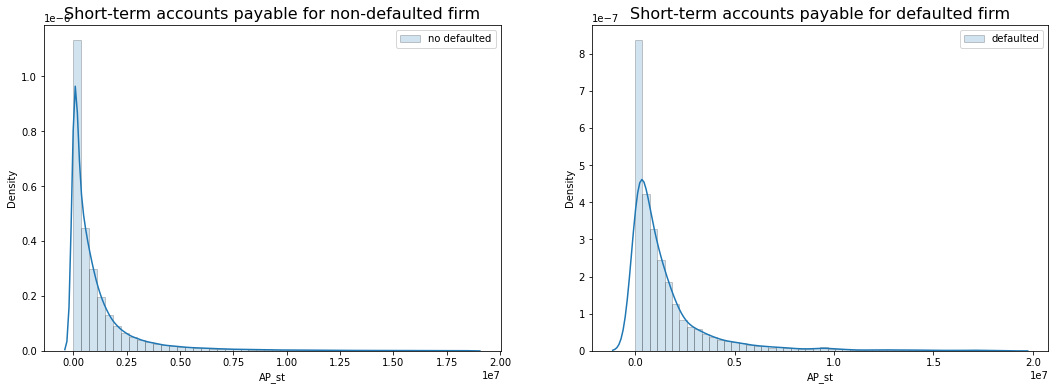

In [ ]:
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(df_apst[df_apst['defaulted'] == 0]['AP_st'], label='no defaulted', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(df_apst[df_apst['defaulted'] == 1]['AP_st'], label='defaulted', 
             ax=ax[1], hist_kws=hist_kws)
ax[0].set_title('Short-term accounts payable for non-defaulted firm', fontsize=16)
ax[0].legend()

ax[1].set_title('Short-term accounts payable for defaulted firm', fontsize=16)
ax[1].legend()
plt.show()

### firm has less accounts payable are more likely to make default

In [ ]:
df['AP_lt'].quantile([i * 0.1 for i in range(10)])

0.0   -587978.0
0.1         0.0
0.2         0.0
0.3         0.0
0.4         0.0
0.5         0.0
0.6         0.0
0.7         0.0
0.8         0.0
0.9         0.0
Name: AP_lt, dtype: float64

In [ ]:
df['AP_lt'].describe()

count    9.313080e+05
mean     2.293656e+04
std      1.297701e+06
min     -5.879780e+05
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.332880e+08
Name: AP_lt, dtype: float64

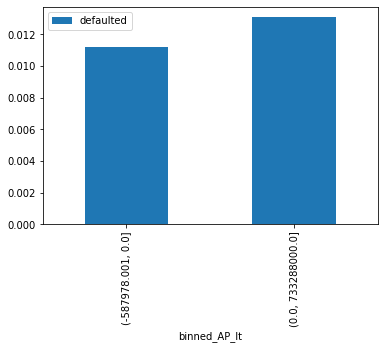

In [ ]:
plot_distribution(df, 20, 'AP_lt')

In [ ]:
sum(df['AP_lt'].isna())

92244

In [ ]:
lt_count = {}
for i in df['AP_lt']:
  if i < 0:
    lt_count['less0'] = lt_count.get('less0', 1) + 1
  elif i == 0:
    lt_count['0'] = lt_count.get('0', 0) + 1
  else:
    lt_count['great0'] = lt_count.get('great0', 0) + 1
lt_count


{'0': 910254, 'great0': 113177, 'less0': 122}

# debt

In [ ]:
df['debt_sum'] = df['debt_bank_st'] + df['debt_fin_st'] + df['AP_st']
df[['debt_st', 'debt_sum']].head(20)

,debt_st,debt_sum
0,237238.0,195136.0
1,525040.0,295565.0
2,825923.0,266225.0
3,366108.0,319290.0
4,801760.0,632248.0
5,210967.0,155874.0
6,453756.0,339575.0
7,440327.0,366548.0
8,312843.0,224938.0
9,458973.0,393152.0


In [ ]:
df_stdebt = df[df['debt_st'] < df['debt_st'].quantile(0.99)]

In [ ]:
df_stdebt[df_stdebt ['defaulted'] == 0]['debt_st'].describe()

count    1.001906e+06
mean     2.945798e+06
std      4.800469e+06
min     -7.759426e+07
25%      6.753640e+05
50%      1.509642e+06
75%      3.035380e+06
max      4.656661e+07
Name: debt_st, dtype: float64

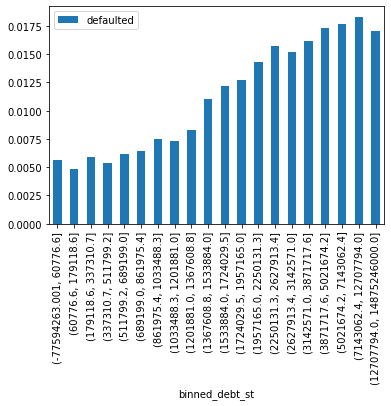

In [ ]:
plot_distribution(df, 20, 'debt_st')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


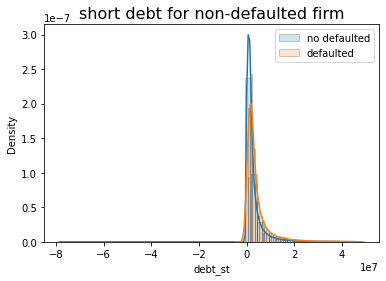

In [ ]:
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig = plt.figure()
sns.distplot(df_stdebt[df_stdebt ['defaulted'] == 0]['debt_st'], label='no defaulted', hist_kws=hist_kws)
sns.distplot(df_stdebt[df_stdebt['defaulted'] == 1]['debt_st'], label='defaulted', hist_kws=hist_kws)
plt.title('short debt for non-defaulted firm', fontsize=16)
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


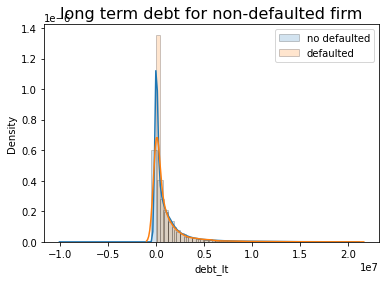

In [ ]:
df_ldebt = df[df['debt_lt'] < df['debt_lt'].quantile(0.99)]
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig = plt.figure()
sns.distplot(df_ldebt[df_ldebt['defaulted'] == 0]['debt_lt'], label='no defaulted', hist_kws=hist_kws)
sns.distplot(df_ldebt[df_ldebt['defaulted'] == 1]['debt_lt'], label='defaulted', hist_kws=hist_kws)
plt.title('long term debt for non-defaulted firm', fontsize=16)
plt.legend()
plt.show()

# rev_operations

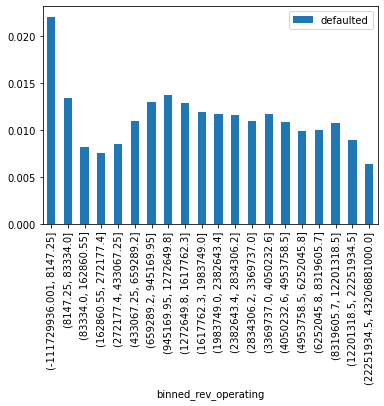

In [ ]:
plot_distribution(df, 20, 'rev_operating')

# make binary feature

In [ ]:
df_rev = df[df['rev_operating'] < df['rev_operating'].quantile(0.99)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


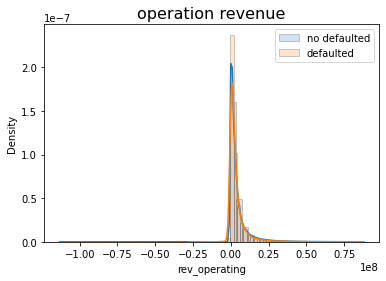

In [ ]:
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig = plt.figure()
sns.distplot(df_rev[df_rev['defaulted'] == 0]['rev_operating'], label='no defaulted', hist_kws=hist_kws)
sns.distplot(df_rev[df_rev['defaulted'] == 1]['rev_operating'], label='defaulted', hist_kws=hist_kws)
plt.title('operation revenue', fontsize=16)
plt.legend()
plt.show()

# Cost of goods

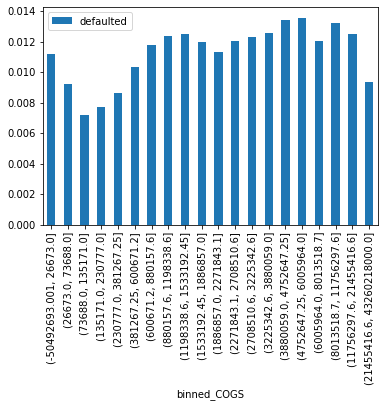

In [ ]:
plot_distribution(df, 20, 'COGS')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


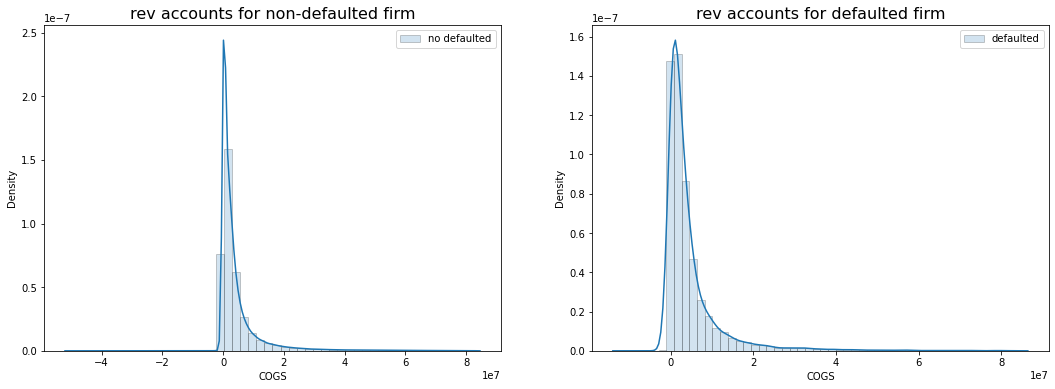

In [ ]:
df_COGS = df[df['COGS'] < df['COGS'].quantile(0.99)]
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(df_COGS[df_COGS['defaulted'] == 0]['COGS'], label='no defaulted', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(df_COGS[df_COGS['defaulted'] == 1]['COGS'], label='defaulted', 
             ax=ax[1], hist_kws=hist_kws)
ax[0].set_title('rev accounts for non-defaulted firm', fontsize=16)
ax[0].legend()

ax[1].set_title('rev accounts for defaulted firm', fontsize=16)
ax[1].legend()
plt.show()

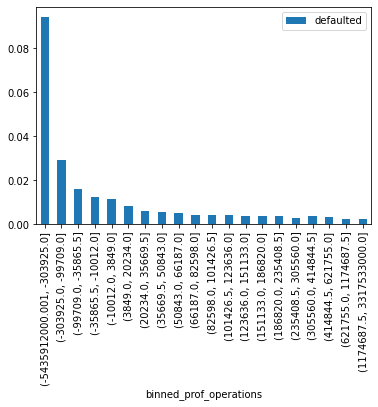

In [ ]:
plot_distribution(df, 'prof_operations')

# make binary feature

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


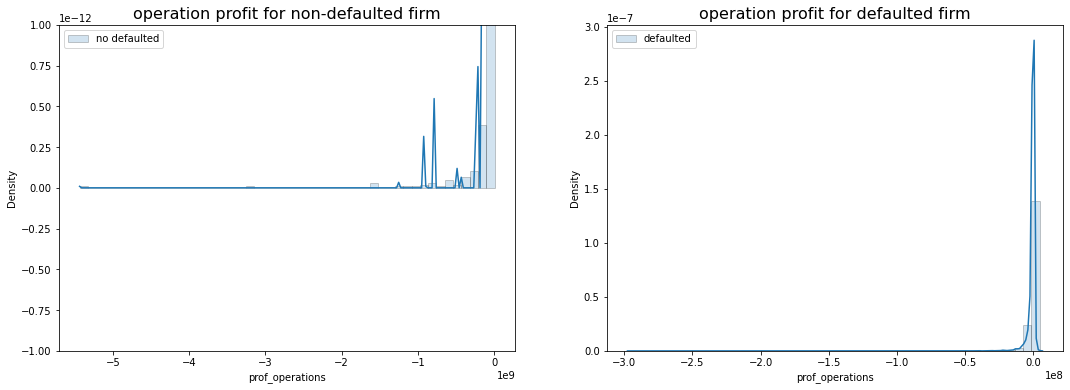

In [ ]:
df_operation = df[df['prof_operations'] < df['prof_operations'].quantile(0.99)]
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(df_operation[df_operation['defaulted'] == 0]['prof_operations'], label='no defaulted', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(df_operation[df_operation['defaulted'] == 1]['prof_operations'], label='defaulted', 
             ax=ax[1], hist_kws=hist_kws)
ax[0].set_title('operation profit for non-defaulted firm', fontsize=16)
ax[0].legend()
ax[1].set_title('operation profit for defaulted firm', fontsize=16)
ax[1].legend()
plt.show()

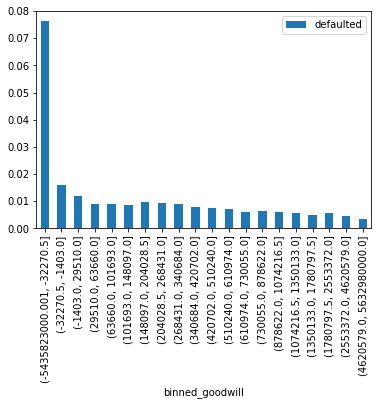

In [ ]:
plot_distribution(df, 'goodwill')

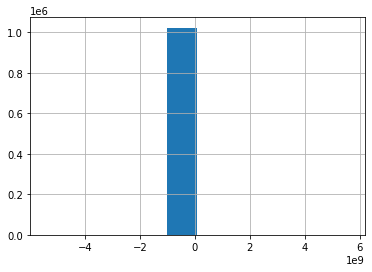

In [ ]:
df['goodwill'].hist()

# make binary 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


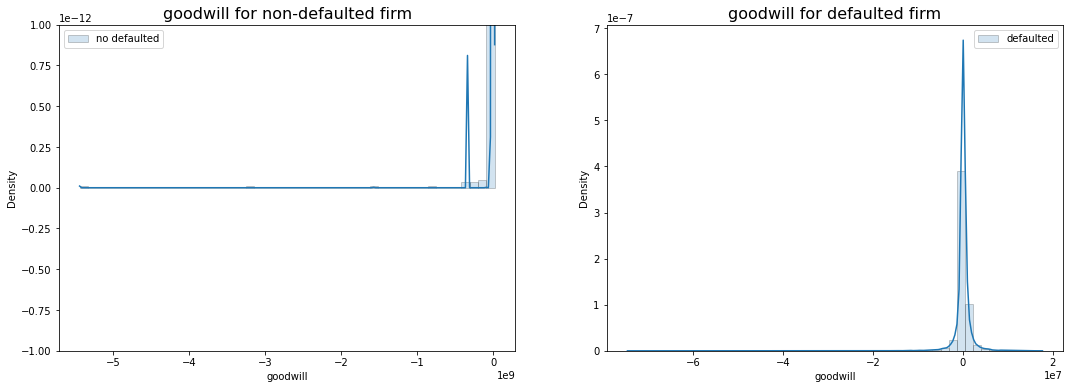

In [ ]:
df_goodwill = df[df['goodwill'] < df['goodwill'].quantile(0.99)]
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(df_goodwill[df_goodwill['defaulted'] == 0]['goodwill'], label='no defaulted', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(df_goodwill[df_goodwill['defaulted'] == 1]['goodwill'], label='defaulted', 
             ax=ax[1], hist_kws=hist_kws)
ax[0].set_title('goodwill for non-defaulted firm', fontsize=16)
ax[0].legend()
ax[1].set_title('goodwill for defaulted firm', fontsize=16)
ax[1].legend()
plt.show()

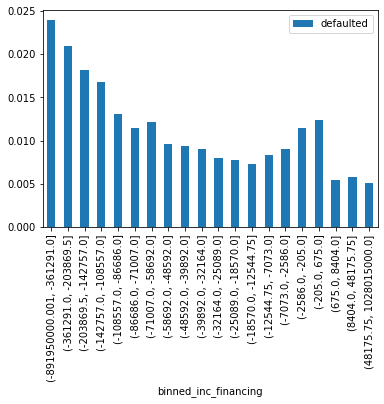

In [ ]:
plot_distribution(df, 20, 'inc_financing')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


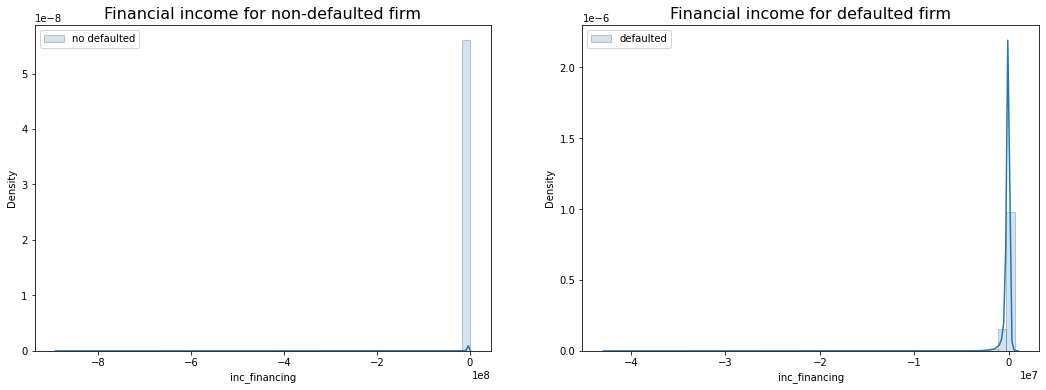

In [ ]:
df_financing = df[df['inc_financing'] < df['inc_financing'].quantile(0.99)]
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(df_financing[df_financing['defaulted'] == 0]['inc_financing'], label='no defaulted', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(df_financing[df_financing['defaulted'] == 1]['inc_financing'], label='defaulted', 
             ax=ax[1], hist_kws=hist_kws)
ax[0].set_title('Financial income for non-defaulted firm', fontsize=16)
ax[0].legend()
ax[1].set_title('Financial income for defaulted firm', fontsize=16)
ax[1].legend()
plt.show()

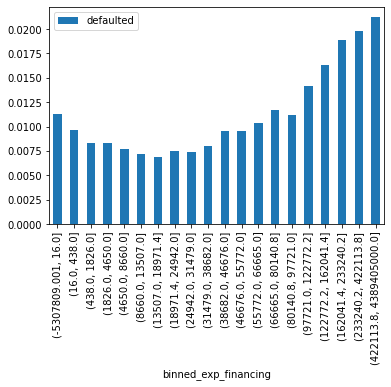

In [ ]:
plot_distribution(df, 20, 'exp_financing')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


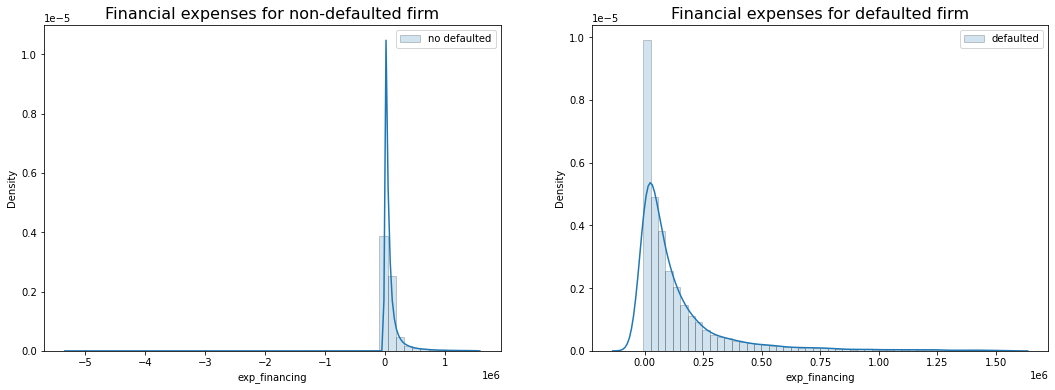

In [ ]:
df_expfinancing = df[df['exp_financing'] < df['exp_financing'].quantile(0.99)]
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(df_expfinancing[df_expfinancing['defaulted'] == 0]['exp_financing'], label='no defaulted', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(df_expfinancing[df_expfinancing['defaulted'] == 1]['exp_financing'], label='defaulted', 
             ax=ax[1], hist_kws=hist_kws)
ax[0].set_title('Financial expenses for non-defaulted firm', fontsize=16)
ax[0].legend()
ax[1].set_title('Financial expenses for defaulted firm', fontsize=16)
ax[1].legend()
plt.show()

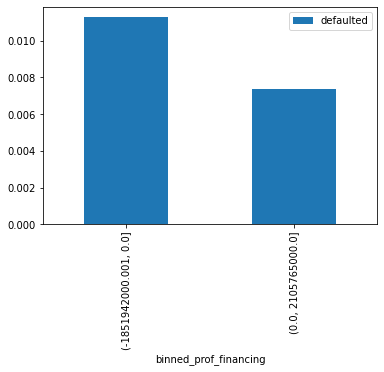

In [ ]:
plot_distribution(df, 20, 'prof_financing')

In [ ]:
df['prof_financing'].quantile([i * 0.1 for i in range(10)])

0.0   -1.851942e+09
0.1    0.000000e+00
0.2    0.000000e+00
0.3    0.000000e+00
0.4    0.000000e+00
0.5    0.000000e+00
0.6    0.000000e+00
0.7    0.000000e+00
0.8    0.000000e+00
0.9    0.000000e+00
Name: prof_financing, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


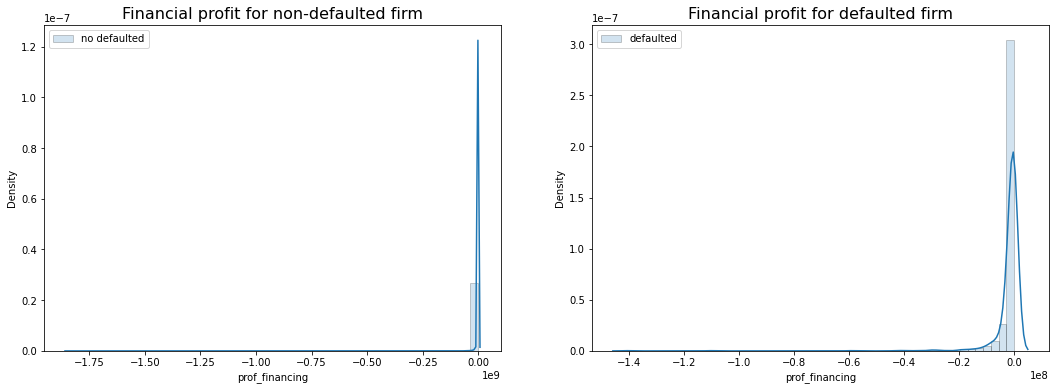

In [ ]:
df_prof_financing = df[df['prof_financing'] < df['prof_financing'].quantile(0.99)]
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(df_prof_financing[df_prof_financing['defaulted'] == 0]['prof_financing'], label='no defaulted', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(df_prof_financing[df_prof_financing['defaulted'] == 1]['prof_financing'], label='defaulted', 
             ax=ax[1], hist_kws=hist_kws)
ax[0].set_title('Financial profit for non-defaulted firm', fontsize=16)
ax[0].legend()
ax[1].set_title('Financial profit for defaulted firm', fontsize=16)
ax[1].legend()
plt.show()

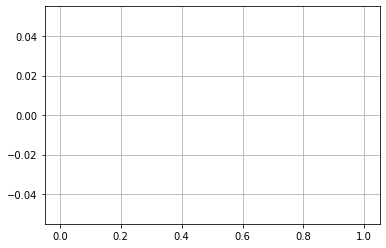

In [ ]:
col = 'prof_financing'
df[(df[col] < df[col].quantile(.95)) & (df[col] > df[col].quantile(.05))][col].hist()
#plot_distribution(df, 40, 'prof_financing')

In [ ]:
df[col].quantile(.95)

0.0

In [ ]:
df[col].quantile(.05)

0.0

In [ ]:
df.head()

,Unnamed: 0,id,stmt_date,HQ_city,legal_struct,ateco_sector,def_date,fs_year,asst_intang_fixed,asst_tang_fixed,...,ebitda,roa,roe,wc_net,margin_fin,cf_operations,defaulted,binned_prof_operations,binned_goodwill,binned_prof_financing
0,17,520288,2011-12-31,28.0,SRL,14.0,NaT,2011,67537.0,1137566.0,...,6318.0,-3.81,-28.03,496258.0,-917029.0,-849.0,0,"(-99709.0, -35865.5]","(148097.0, 204028.5]","(-9119.875, 0.0]"
1,18,520288,2008-12-31,28.0,SRL,14.0,NaT,2008,256438.0,1181416.0,...,46088.0,-2.76,NaN,97952.0,NaN,-3881.0,0,"(-99709.0, -35865.5]","(204028.5, 268431.0]","(-9119.875, 0.0]"
2,19,520288,2009-12-31,28.0,SRL,14.0,NaT,2009,194046.0,1152014.0,...,67611.0,-2.17,NaN,-210671.0,NaN,32618.0,0,"(-99709.0, -35865.5]","(204028.5, 268431.0]","(-9119.875, 0.0]"
3,21,520288,2012-12-31,28.0,SRL,14.0,NaT,2012,15195.0,1116938.0,...,-161478.0,-12.99,NaN,367892.0,-1094962.0,-168907.0,0,"(-303925.0, -99709.0]","(-32270.5, -1403.0]","(-9119.875, 0.0]"
4,22,520288,2007-12-31,28.0,SRL,14.0,NaT,2007,126603.0,1127807.0,...,153060.0,6.20,52.43,-317007.0,-1184970.0,80039.0,0,"(101426.5, 123636.0]","(340684.0, 420702.0]","(-9119.875, 0.0]"


In [ ]:
df[['asst_intang_fixed', 'asst_tang_fixed', 'asst_fixed_fin', 'asst_current', 'asst_tot']].corr()

,asst_intang_fixed,asst_tang_fixed,asst_fixed_fin,asst_current,asst_tot
asst_intang_fixed,1.000000,0.176998,0.164794,0.277029,0.320623
asst_tang_fixed,0.176998,1.000000,0.390115,0.448232,0.932832
asst_fixed_fin,0.164794,0.390115,1.000000,0.340169,0.556991
asst_current,0.277029,0.448232,0.340169,1.000000,0.702404
asst_tot,0.320623,0.932832,0.556991,0.702404,1.000000


In [ ]:
df['inc_financing'].quantile([i * 0.1 for i in range(10)])

0.0   -891950000.0
0.1      -203869.5
0.2      -108557.0
0.3       -71007.0
0.4       -48592.0
0.5       -32164.0
0.6       -18570.0
0.7        -7073.0
0.8         -205.0
0.9         8404.0
Name: inc_financing, dtype: float64

#### inc_extraord

Meaning: Extraordinary income. It mean income statement events that are both unusual and infrequent.

<AxesSubplot:>

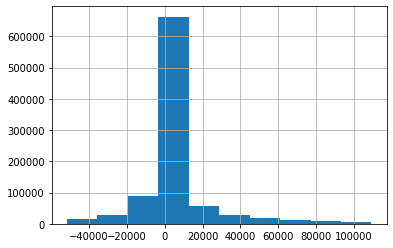

In [66]:
col = 'inc_extraord'
df[(df[col] < df[col].quantile(.95)) & (df[col] > df[col].quantile(.05))][col].hist()

In [10]:
(df['inc_extraord']!=0).mean()

0.8096227646470331

In [11]:
df['inc_extraord'].quantile(np.linspace(.1, 1, 9, 0))

0.1   -15673.0
0.2    -1935.0
0.3       -2.0
0.4        0.0
0.5        0.0
0.6        1.0
0.7     1227.0
0.8     8911.0
0.9    39999.0
Name: inc_extraord, dtype: float64

In [36]:
df['binned_inc_extraord'] = pd.qcut(df['inc_extraord'], 30,duplicates='drop')

<AxesSubplot:xlabel='binned_inc_extraord'>

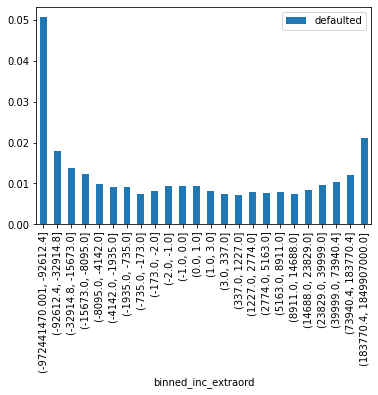

In [37]:
df[['binned_inc_extraord', 'defaulted']].groupby('binned_inc_extraord').mean().reset_index().sort_values('binned_inc_extraord').set_index('binned_inc_extraord').plot.bar()


bin (-972441470.001, -15673.0]	is significantly larger in defaulted probability.

#### taxes

<AxesSubplot:>

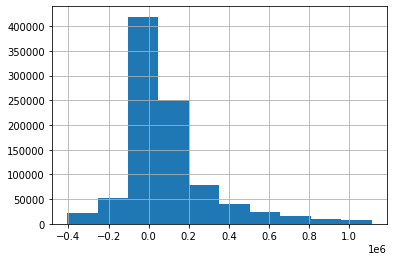

In [65]:
col = 'taxes'
df[(df[col] < df[col].quantile(.95)) & (df[col] > df[col].quantile(.05))][col].hist()

In [57]:
df['taxes'].quantile(np.linspace(.1, 1, 9, 0))

0.1   -148026.2
0.2    -29899.2
0.3       252.0
0.4     18692.0
0.5     40584.0
0.6     71388.0
0.7    124129.3
0.8    233889.6
0.9    542028.0
Name: taxes, dtype: float64

<AxesSubplot:xlabel='binned_taxes'>

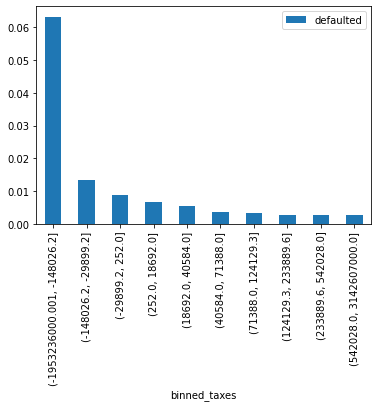

In [52]:
df['binned_taxes'] = pd.qcut(df['taxes'], 10,duplicates='drop')
df[['binned_taxes', 'defaulted']].groupby('binned_taxes').mean().reset_index().sort_values('binned_taxes').set_index('binned_taxes').plot.bar()

bin (-1953236000.001, -148026.2] has a significantly larger probability of default.

#### profit

<AxesSubplot:>

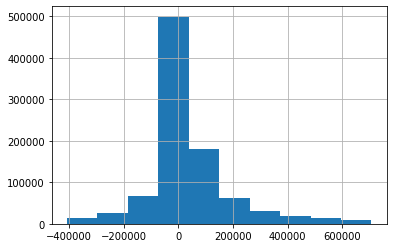

In [68]:
col = 'profit'
df[(df[col] < df[col].quantile(.95)) & (df[col] > df[col].quantile(.05))][col].hist()

<AxesSubplot:xlabel='binned_profit'>

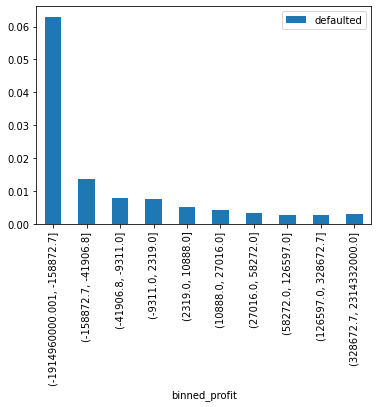

In [69]:
df['binned_'+col] = pd.qcut(df[col], 10,duplicates='drop')
df[['binned_'+col, 'defaulted']].groupby('binned_'+col).mean().reset_index().sort_values('binned_'+col).set_index('binned_'+col).plot.bar()

#### days_rec

Days recievables. The average time a customer takes to pay back a business for products or services purchased

<AxesSubplot:>

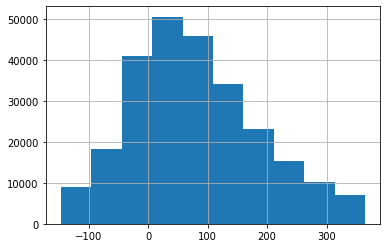

In [70]:
col = 'days_rec'
df[(df[col] < df[col].quantile(.95)) & (df[col] > df[col].quantile(.05))][col].hist()

In [71]:
df[col].describe()

count    283341.000000
mean         84.886815
std         167.310720
min        -499.410000
25%          -3.720000
50%          66.420000
75%         158.490000
max        2295.840000
Name: days_rec, dtype: float64

<AxesSubplot:xlabel='binned_days_rec'>

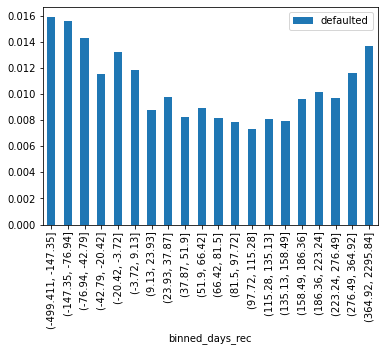

In [73]:
df['binned_'+col] = pd.qcut(df[col], 20,duplicates='drop')
df[['binned_'+col, 'defaulted']].groupby('binned_'+col).mean().reset_index().sort_values('binned_'+col).set_index('binned_'+col).plot.bar()

####  ebitda
Earnings before interest, taxes, depreciation, and amortization

<AxesSubplot:>

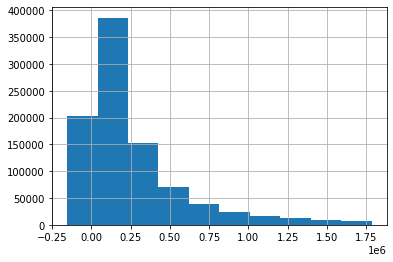

In [74]:
col = 'ebitda'
df[(df[col] < df[col].quantile(.95)) & (df[col] > df[col].quantile(.05))][col].hist()

In [75]:
df[col].describe()

count    1.023471e+06
mean     6.070971e+05
std      1.507074e+07
min     -5.435868e+09
25%      4.004000e+04
50%      1.504030e+05
75%      3.813440e+05
max      4.227442e+09
Name: ebitda, dtype: float64

<AxesSubplot:xlabel='binned_ebitda'>

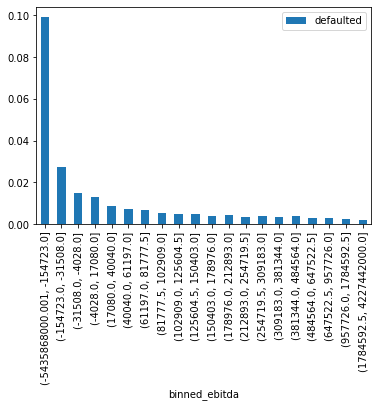

In [76]:
df['binned_'+col] = pd.qcut(df[col], 20,duplicates='drop')
df[['binned_'+col, 'defaulted']].groupby('binned_'+col).mean().reset_index().sort_values('binned_'+col).set_index('binned_'+col).plot.bar()

#### roa
Return on assets. A financial ratio that indicates how profitable a company is in relation to its total assets.

Formula: Net Income/Total asset.

<AxesSubplot:>

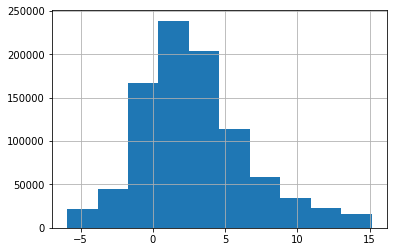

In [77]:
col = 'roa'
df[(df[col] < df[col].quantile(.95)) & (df[col] > df[col].quantile(.05))][col].hist()

<AxesSubplot:xlabel='binned_roa'>

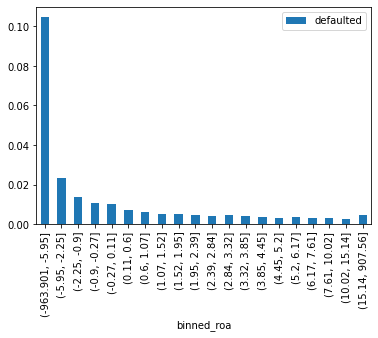

In [78]:
df['binned_'+col] = pd.qcut(df[col], 20,duplicates='drop')
df[['binned_'+col, 'defaulted']].groupby('binned_'+col).mean().reset_index().sort_values('binned_'+col).set_index('binned_'+col).plot.bar()

#### roe
return on equity. A measure of the return generated on the net assets of the company. It's simply divide the company's net income by its average shareholders' equity.

<AxesSubplot:>

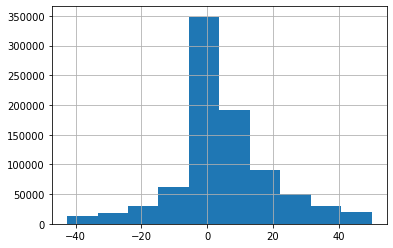

In [38]:
col = 'roe'
df[(df[col] < df[col].quantile(.95)) & (df[col] > df[col].quantile(.05))][col].hist()

<AxesSubplot:xlabel='binned_roe'>

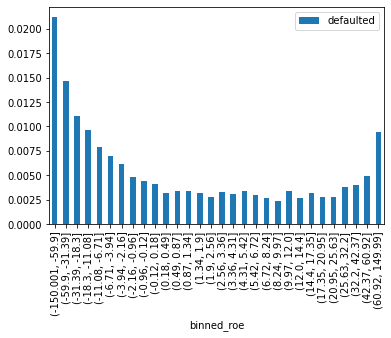

In [39]:
df['binned_'+col] = pd.qcut(df[col], 30,duplicates='drop')
df[['binned_'+col, 'defaulted']].groupby('binned_'+col).mean().reset_index().sort_values('binned_'+col).set_index('binned_'+col).plot.bar()

#### wc_net

Net_working_capital. Working_capital is current assets - current liability.

<AxesSubplot:>

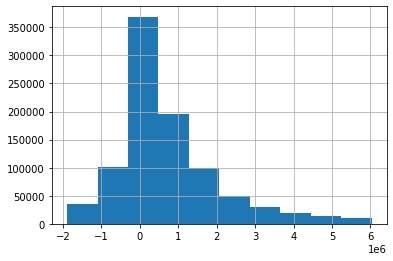

In [84]:
col = 'wc_net'
df[(df[col] < df[col].quantile(.95)) & (df[col] > df[col].quantile(.05))][col].hist()

<AxesSubplot:xlabel='binned_wc_net'>

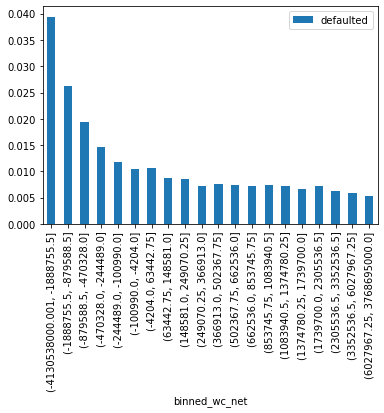

In [85]:
df['binned_'+col] = pd.qcut(df[col], 20,duplicates='drop')
df[['binned_'+col, 'defaulted']].groupby('binned_'+col).mean().reset_index().sort_values('binned_'+col).set_index('binned_'+col).plot.bar()

#### margin_fin
(Equity - Fixed assets). 

<AxesSubplot:>

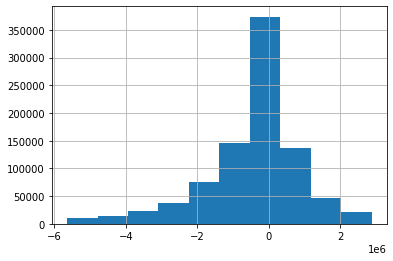

In [88]:
col = 'margin_fin'
df[(df[col] < df[col].quantile(.95)) & (df[col] > df[col].quantile(.05))][col].hist()

<AxesSubplot:xlabel='binned_margin_fin'>

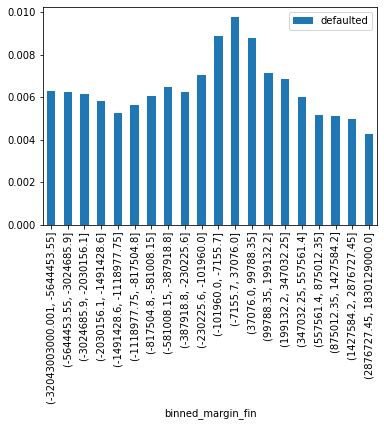

In [91]:
df['binned_'+col] = pd.qcut(df[col], 20,duplicates='drop')
df[['binned_'+col, 'defaulted']].groupby('binned_'+col).mean().reset_index().sort_values('binned_'+col).set_index('binned_'+col).plot.bar()

# cf_operations
Operating cashflow. The amount of cash generated by a company's normal business operations.

<AxesSubplot:>

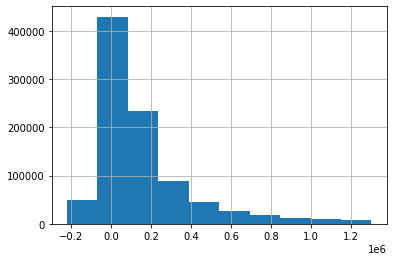

In [92]:
col = 'cf_operations'
df[(df[col] < df[col].quantile(.95)) & (df[col] > df[col].quantile(.05))][col].hist()

<AxesSubplot:xlabel='binned_cf_operations'>

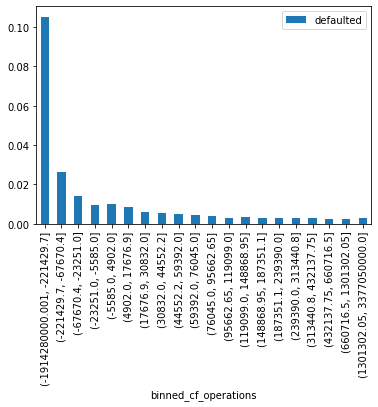

In [93]:
df['binned_'+col] = pd.qcut(df[col], 20,duplicates='drop')
df[['binned_'+col, 'defaulted']].groupby('binned_'+col).mean().reset_index().sort_values('binned_'+col).set_index('binned_'+col).plot.bar()

<AxesSubplot:>

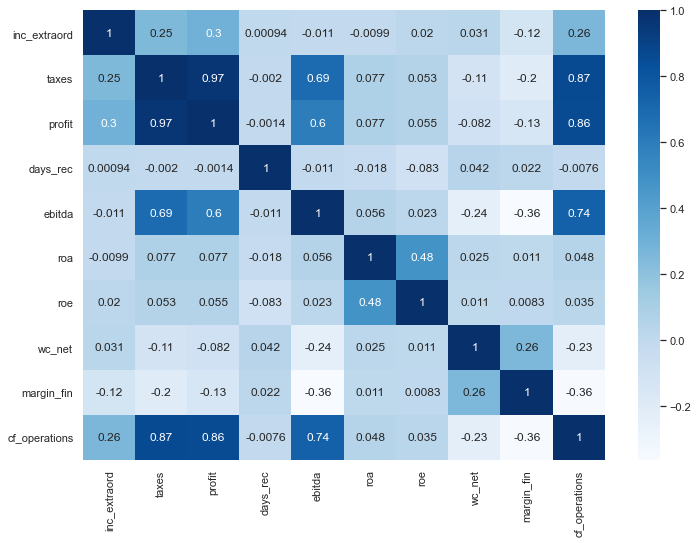

In [99]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
corr = df[['inc_extraord', 'taxes', 'profit', 'days_rec',
       'ebitda', 'roa', 'roe', 'wc_net', 'margin_fin', 'cf_operations']].corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="Blues", annot=True)


In [40]:
s = df.corr().abs().unstack()
s = s[(~s.isnull()) & (s!=1)]
pairs = s.sort_values(kind="quicksort", ascending=False)
pairs

rev_operating    COGS             0.996275
COGS             rev_operating    0.996275
profit           taxes            0.968024
taxes            profit           0.968024
asst_tang_fixed  eqty_tot         0.933470
                                    ...   
AR               fs_year          0.000051
HQ_city          margin_fin       0.000029
margin_fin       HQ_city          0.000029
liab_lt_emp      id               0.000004
id               liab_lt_emp      0.000004
Length: 1640, dtype: float64

In [43]:
pairs[('inc_extraord','inc_financing')]

0.05699553390603197

In [117]:
pairs.values

array([9.96275102e-01, 9.96275102e-01, 9.68023547e-01, ...,
       2.92861178e-05, 4.40055457e-06, 4.40055457e-06])

In [119]:
for key_pair, cor in zip(pairs.keys(), pairs.values):
    if cor > 0.8:
        print(key_pair, cor)

('rev_operating', 'COGS') 0.9962751020290098
('COGS', 'rev_operating') 0.9962751020290098
('profit', 'taxes') 0.9680235474014625
('taxes', 'profit') 0.9680235474014625
('asst_tang_fixed', 'eqty_tot') 0.9334698722549896
('eqty_tot', 'asst_tang_fixed') 0.9334698722549896
('asst_current', 'debt_st') 0.9333088515165024
('debt_st', 'asst_current') 0.9333088515165024
('asst_tot', 'asst_tang_fixed') 0.9328322376656211
('asst_tang_fixed', 'asst_tot') 0.9328322376656211
('asst_current', 'AR') 0.9322259824602546
('AR', 'asst_current') 0.9322259824602546
('asst_tot', 'eqty_tot') 0.92991572104109
('eqty_tot', 'asst_tot') 0.92991572104109
('prof_operations', 'ebitda') 0.9283590139842652
('ebitda', 'prof_operations') 0.9283590139842652
('goodwill', 'ebitda') 0.8953207513551477
('ebitda', 'goodwill') 0.8953207513551477
('asst_tang_fixed', 'margin_fin') 0.880756678771886
('margin_fin', 'asst_tang_fixed') 0.880756678771886
('AR', 'debt_st') 0.877036314815547
('debt_st', 'AR') 0.877036314815547
('taxes'

In [126]:
df.groupby('fs_year')['defaulted'].value_counts(normalize=True)

fs_year  defaulted
2007     0            0.993960
         1            0.006040
2008     0            0.990677
         1            0.009323
2009     0            0.987093
         1            0.012907
2010     0            0.986060
         1            0.013940
2011     0            0.987312
         1            0.012688
2012     0            0.988483
         1            0.011517
Name: defaulted, dtype: float64

### Baseline Model(logistic)

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics

### preprocess for target variable

In [112]:
df = pd.read_csv('data/train.csv')
df['stmt_date'] = pd.to_datetime(df['stmt_date'])
df['def_date'] = pd.to_datetime(df['def_date'])
# change of target variable
def defaulted(ser):
    if pd.isnull(ser['def_date']) or (ser['def_date'] - ser['stmt_date']).days > 365:
        return 0 
    else:
        return 1
df['defaulted'] = df.apply(defaulted,axis=1)

### drop irrelevant cols

In [113]:
dropped_cols = ['id', 'stmt_date', 'def_date', 'fs_year'
               #null
                ,'eqty_corp_family_tot','days_rec']
df_dropped = df.drop(columns = dropped_cols)
df_dropped.dropna(inplace = True)
y = df_dropped['defaulted']
df_dropped = df_dropped.drop(columns = 'defaulted')

#### One hot encode categorical cols

In [114]:
# One hot encode cols
from sklearn.preprocessing import OneHotEncoder
one_hot_cols = ['HQ_city', 'legal_struct','ateco_sector']
enc = OneHotEncoder(handle_unknown='ignore',sparse=False)
df_ohc = enc.fit_transform(df_dropped[one_hot_cols])

In [115]:
# concatenate two matrices
to_be_trained = np.concatenate([df_dropped.drop(columns = one_hot_cols).values, df_ohc], axis =1)

### Train Model

In [118]:
X = to_be_trained
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [121]:
clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)

### preformance on training set

In [140]:
1-df['defaulted'].mean()

0.9887440989808041

In [141]:
(y_train== clf.predict(X_train)).mean()

0.9948172933024736

In [125]:
f1_score(y_train, clf.predict(X_train), average='binary')

0.002785515320334262

In [127]:
precision_score(y_train, clf.predict(X_train), average='binary')

0.06153846153846154

In [128]:
recall_score(y_train, clf.predict(X_train), average='binary')

0.0014250089063056644

In [131]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, clf.predict(X_train))
metrics.auc(fpr, tpr)

0.5006570297350735

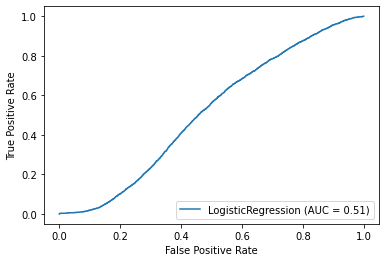

In [132]:
metrics.plot_roc_curve(clf, X_train, y_train) 

#### test set performance

f1 0.0026755852842809368
precision 0.05714285714285714
recall 0.0013698630136986301
auc 0.500623982925289


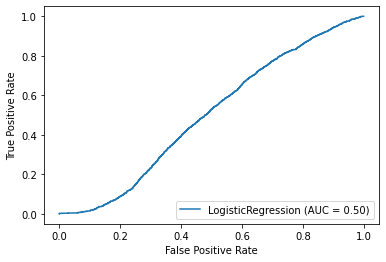

In [134]:
print('f1',f1_score(y_test, clf.predict(X_test), average='binary'))

print('precision',precision_score(y_test, clf.predict(X_test), average='binary'))

print('recall', recall_score(y_test, clf.predict(X_test), average='binary'))

fpr, tpr, thresholds = metrics.roc_curve(y_test, clf.predict(X_test))
print('auc',metrics.auc(fpr, tpr))

metrics.plot_roc_curve(clf, X_test, y_test) 